# *Enhancing Urban Mobility through a Web-Enabled Predictive System for Metro Interstate Traffic using Machine Learning and Data Analytics*

## Table of Contents

### 1. [Introduction](#Introduction) 
  1.1 [Problem Statement](#Problem-Statement)  
  1.2 [Objective of the Project](#Objective-of-the-Project)  
  1.3 [Dataset Source and Description](#Dataset-Source-and-Description)  
  1.4 [Real World Use Case](#Real-World-Use-Case)  

### 2. [Importing Required Libraries](#Importing-Required-Libraries)  

### 3. [Loading the Dataset](#Loading-the-Dataset)  
  3.1 [Sample of the Dataset](#Sample-of-the-Dataset)  
  3.2 [Dropping the Unnecessary Column](#Dropping-Unnecessary-Column)  
  3.3 [Display the Number of Rows and Columns](#Display-the-Number-of-Rows-and-Columns)  

### 4. [Data Understanding](#Data-Understanding)  
4.1 [Column Description](#Column-Description)  
4.2 [Basic Statistics](#Basic-Statistics)  
4.3 [Identification of Numerical and Categorical Columns](#Identification-of-Numerical-and-Categorical-Columns)
 

### 5. [Exploratory Data Analysis and Data Pre-Processing](#Exploratory-Data-Analysis-and-Data-Pre-Processing)  
  5.1 [Feature Engineering](#Feature-Engineering)  
  5.2 [Outlier Detection](#Outlier-Detection)  

### 6. [Machine Learning Pipeline](#Machine-Learning-Pipeline)
  6.1 [Model Building](#Model-Building)  
  6.2 [Model Training, Evaluation, and Selection](#Model-Training,-Evaluation,-and-Selection)

### 7. [Conclusion](#Conclusion)  


### Introduction

Urban traffic congestion is a growing problem worldwide.  
Predicting traffic volume accurately can:
- Help reduce travel time
- Improve public safety
- Enable smart city planning
- Reduce fuel consumption and emissions

In this project, we aim to predict Metro Interstate Traffic Volume using machine learning models.


#### Problem Statement
Nowadays, traffic is a major issue for everyone, and it is a source of stress for anyone
who has to deal with it on a daily basis. The growth of the population delays traffic and
makes it worse day by day. The settlement of modern civilization looks at it, but it is
unable to act in such a way as to protect people. We can watch traffic, collect data, and
anticipate the next and subsequent observations using a variety of approaches and
patterns. The observation agency then makes observations, which are then required out
and predictions are made. Being stuck in a cosmopolitan city's traffic is the most
common occurrence in one's life.
The goal of this project is to build a prediction model using multiple machine learning
techniques and to use a template to document the end-to-end stages. We're trying to
forecast the value of a continuous variable with the Metro Interstate Traffic Volume
dataset, which is a regression issue.

#### Objective of the Project
To develop a predictive model that estimates traffic volume on metro interstate highways based on real-time data, such as weather conditions, day of the week, holidays and temperature. The goal is to provide accurate predictions that help optimize traffic management, reduce congestion, and improve urban mobility in metro areas.


#### Dataset Source and Description
- Dataset Source - https://www.kaggle.com
- The data consists of 9 column and 48204 rows.

#### Real World Use Case
- Navigation apps can recommend optimal routes by predicting traffic volumes on various paths, helping drivers avoid congested routes.
- Traffic prediction allows dynamic adjustment of traffic light timings, optimizing flow and reducing congestion in busy urban areas. 
- Predicting traffic volume assists in assessing environmental impacts, enabling better planning for reduced pollution and more sustainable traffic management.



### Importing Required Libraries
**Note**: We will use the following libraries for data processing, visualization, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [2]:
df = pd.read_csv("data/data.csv")

#### Sample of the Dataset 

In [3]:
df.head()

,Unnamed: 0,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,no holiday,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,1,no holiday,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,2,no holiday,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,3,no holiday,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,4,no holiday,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


#### Dropping Unnecessary Column


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

#### Display the Number of Rows and Columns

In [5]:
df.shape

(48204, 9)

**Insights**
- The dataset contains **48,204 rows** — each representing a single record or observation.
- There are **9 columns** — each representing a different feature or variable (e.g., temperature, weather condition, traffic volume, etc.).


### Data Understanding

#### Column Description

| Column Name | Description |
|:---|:---|
| holiday | Whether the day was a holiday or not |
| temp | Average temperature in Kelvin |
| rain_1h | Amount in mm of rain that occurred in the hour |
| snow_1h | Amount in mm of snow that occurred in the hour |
| clouds_all | Percentage of cloud cover |
| weather_main | Current weather (Clear, Clouds, Rain, etc.) |
| Weather_Description | Description of the current weather |
| date_time | Hour of the data collected in local CST time |
| traffic_volume | Hourly I-94 ATR 301 reported west bound traffic volume |


#### Basic Statistics 

In [6]:
# Quick Overview of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


**Insights** 

- The dataset contains **48,204 complete records** with **no missing values**.  
- The dataset is **ready for further exploration and modeling**.

In [7]:
# Summary statistics of Dataset
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


**Insights** 
- **Outliers are present**, particularly in `rain_1h`, which has a maximum of **9831.3 mm**, indicating potential data entry errors or rare extreme events.  
- **Traffic volume** varies widely across the dataset.  
- The **median traffic volume** is approximately **3,380 vehicles per hour**, indicating the central tendency of traffic flow.

In [8]:
# Summary of Categorical Columns
df.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,2,11,38,40575
top,no holiday,Clouds,sky is clear,2013-05-19 10:00:00
freq,48143,15164,11665,6


**Insights** 
- Most entries occurred on **non-holidays**, indicating regular traffic and weather conditions.  
- **"Clouds"** is the most common **weather condition** in the dataset.  
- **"Sky is clear"** is the most frequent **weather description**.  
- The timestamp **2013-05-19 10:00:00** appears **most frequently**, repeated **6 times**, which may indicate duplicate or repeated data logging.

#### Identification of Numerical and Categorical Columns

In [9]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']     # List numerical features (non-object columns)
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']     # List categorical features (object columns)

# Print the number of features and their names
print(f'Numerical features: {len(numeric_features)} - {numeric_features}')
print(f'Categorical features: {len(categorical_features)} - {categorical_features}')

Numerical features: 5 - ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']
Categorical features: 4 - ['holiday', 'weather_main', 'weather_description', 'date_time']


### Exploratory Data Analysis and Data Pre-Processing

In [10]:
# Unique values present in the holiday
df['holiday'].unique()

array(['no holiday', 'yes holiday'], dtype=object)

**Insights**
- The column has **two categories**: `'no holiday'` and `'yes holiday'`.



In [11]:
# Check for missing (null) values in each column of the DataFrame
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

**Insights**
- **There are no missing values** in any of the 9 columns of the dataset.
- This indicates the dataset is **complete and clean**, making it ready for analysis without requiring imputation or cleaning for missing data.




In [12]:
# Count the number of duplicate rows in the DataFrame
df.duplicated().sum()

17

**Insights**
- The dataset contains **17 duplicate rows**, as indicated by `df.duplicated().sum()`.  
- These duplicates may result in **redundant information** and could slightly bias analysis.  
- It is generally advisable to **remove duplicate entries** using `df.drop_duplicates()` for cleaner results.

In [13]:
# Remove duplicate rows from the DataFrame and update it in place
df.drop_duplicates(inplace=True)

In [14]:
# Show the earliest and latest timestamps in the 'date_time' column
df['date_time'].min(),df['date_time'].max()

('2012-10-02 09:00:00', '2018-09-30 23:00:00')

**Insights**
- Data ranges from October 2, 2012, 09:00 AM to September 30, 2018, 11:00 PM.  
- Dataset spans nearly 6 years.

#### Feature Engineering

In [15]:
# Sorting values according to time
df.sort_values(by=['date_time'],inplace=True)


In [16]:
# Convert the 'date_time' column to datetime format for easier time-based operations
df['date_time']=pd.to_datetime(df['date_time'])

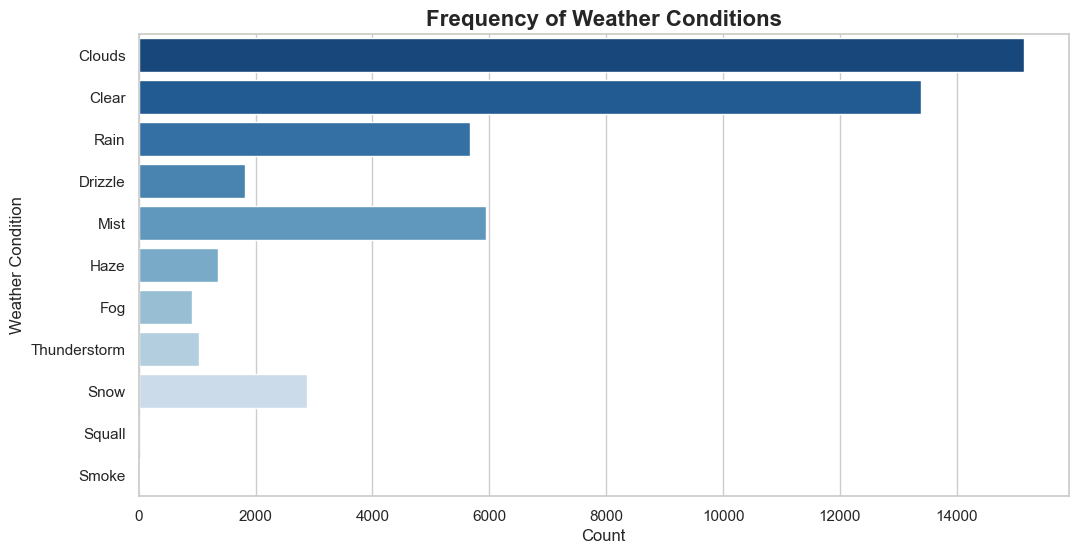

In [17]:
# Create a horizontal count plot to visualize the frequency of each 'weather_main' category
sns.set_theme(style="whitegrid", palette="deep")
plt.figure(figsize=(12, 6))
sns.countplot(y='weather_main', data=df, palette='Blues_r')  # Using reversed blue palette for visual impact

plt.title('Frequency of Weather Conditions', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Weather Condition', fontsize=12)
plt.show()

**Insights**  
- **Clouds** and **Clear** are the most common weather types in the dataset.  
- **Mist** and **Rain** also occur frequently, though less than Clouds and Clear skies.  
- Rare conditions include **Smoke** and **Squall**.  
- Overall, the dataset mainly represents **mild to moderate weather conditions**.


In [18]:
# Get the count of each unique value in the 'weather_main' column
df['weather_main'].value_counts()

weather_main
Clouds          15158
Clear           13384
Mist             5949
Rain             5672
Snow             2875
Drizzle          1820
Haze             1360
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

**Insights** 
- **Clouds** is the most frequent weather condition, appearing **15,158 times**.  
- **Clear** weather is also common, with **13,384 instances**.  
- **Mist** occurs **5,949 times**, making it the third most common condition.  
- **Rain** and **Snow** have **5,672** and **2,875** instances respectively.  
- Less frequent conditions include **Drizzle (1,820)**, **Haze (1,360)**, and **Thunderstorm (1,033)**.  
- **Fog (912)** and **Smoke (20)** are rare.  
- **Squall** is the rarest condition, with only **4 occurrences**.

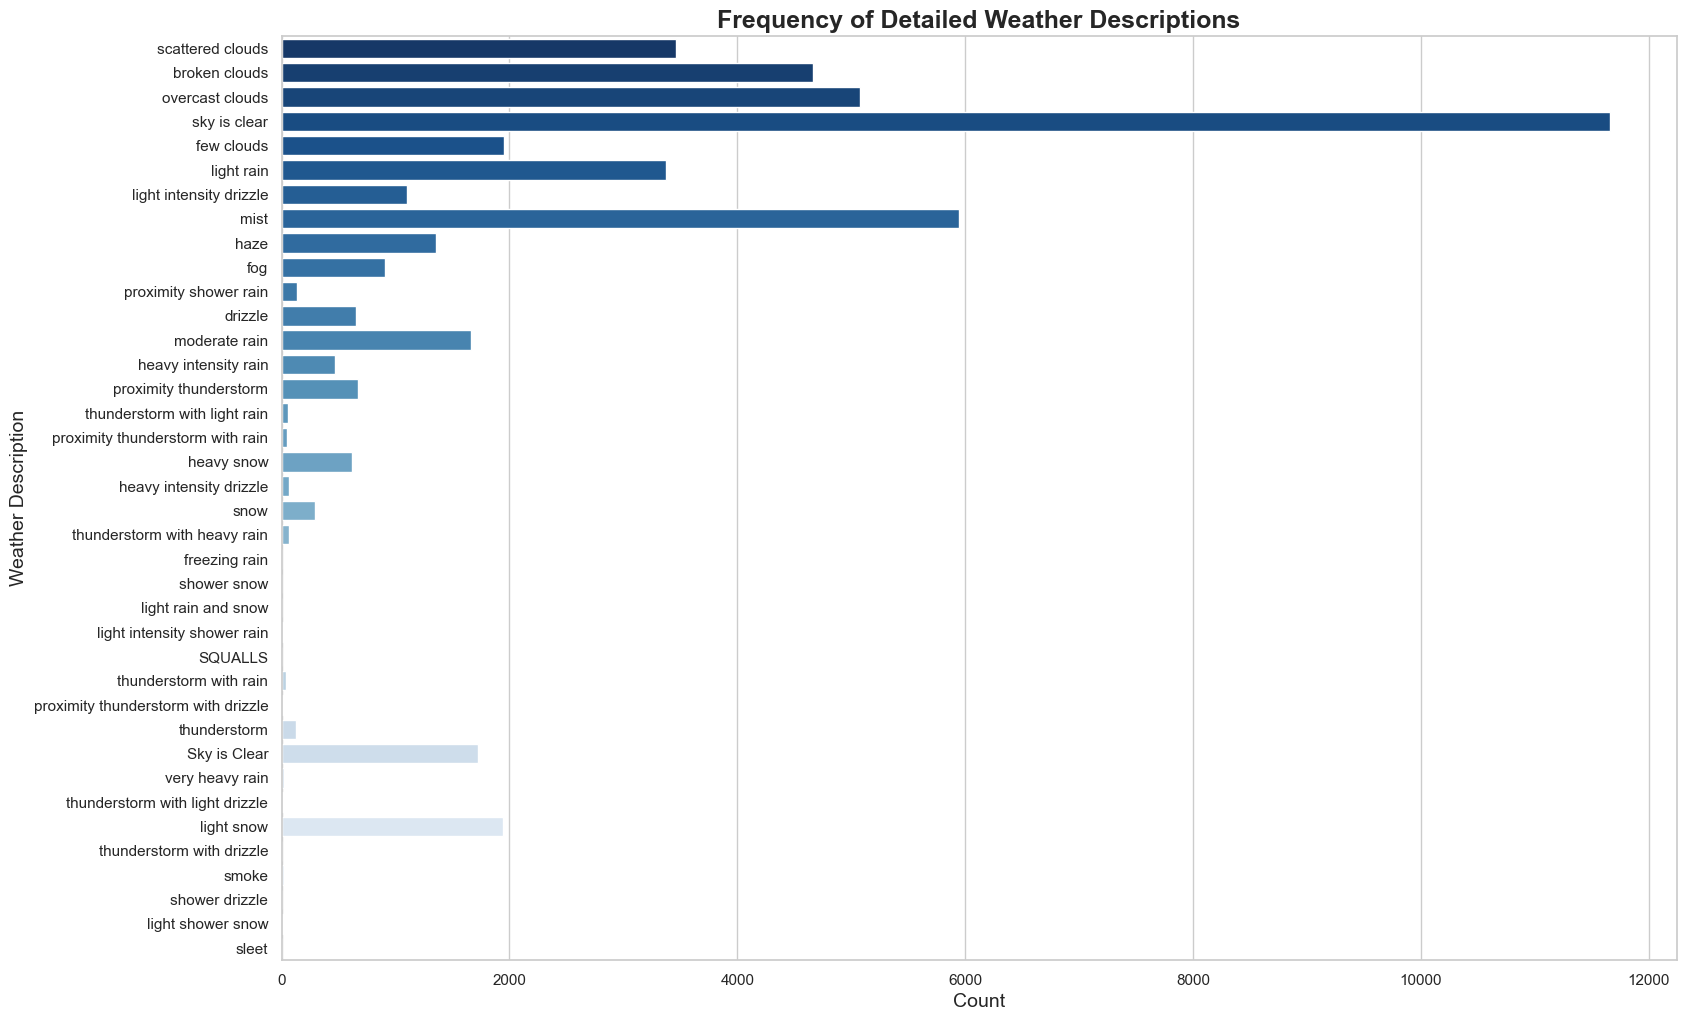

In [19]:
# Create a horizontal count plot for 'weather_description'
sns.set_theme(style="whitegrid", palette="deep")

plt.figure(figsize=(18, 12))
sns.countplot(y='weather_description', data=df, palette='Blues_r')  

plt.title('Frequency of Detailed Weather Descriptions', fontsize=18, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Weather Description', fontsize=14)
plt.show()


**Insights** 
- **"Sky is clear"** is the most frequent weather condition.  
- **Mist, overcast clouds,** and **broken clouds** follow in frequency.  
- **Light rain** and **drizzle** are more common than heavy precipitation.  
- **Severe and snow-related events** are relatively rare.  
- **Smoke, sleet,** and similar conditions are minimal.


#### Outlier Detection

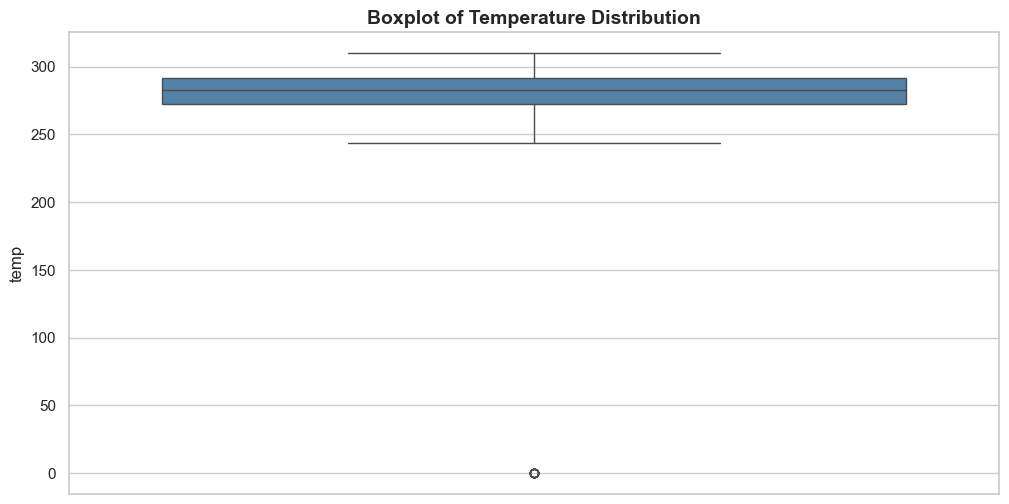

In [20]:
# Create a boxplot to visualize the distribution of temperature and identify outliers
sns.set_theme(style="whitegrid", palette="deep")
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['temp'], color='steelblue') 
plt.title('Boxplot of Temperature Distribution', fontsize=14, fontweight='bold')
plt.show()


**Insights** - 
- Most temperature values lie between **245 and 310**.  
- The distribution is **slightly right-skewed**.  
- There's at least **one significant outlier below zero**.  
- The outlier may suggest a **data entry error** or an **extreme weather event**.


In [21]:
# Define function to remove outliers
def remove_outlier(df,x):
    Q3,Q1 = np.percentile(df,[75,25])
    IQR = Q3 - Q1
    # Upper bound
    upper = np.where(df >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df <= (Q1-1.5*IQR))
 
    #Removing the Outliers
    x.drop(upper[0], inplace = True)
    x.drop(lower[0], inplace = True)
    
remove_outlier(df['temp'],df)

**Explanation**

The `remove_outlier` function removes outliers from a DataFrame column using the IQR method. It drops rows from the original DataFrame where the values fall outside 1.5 times the interquartile range above Q3 or below Q1.

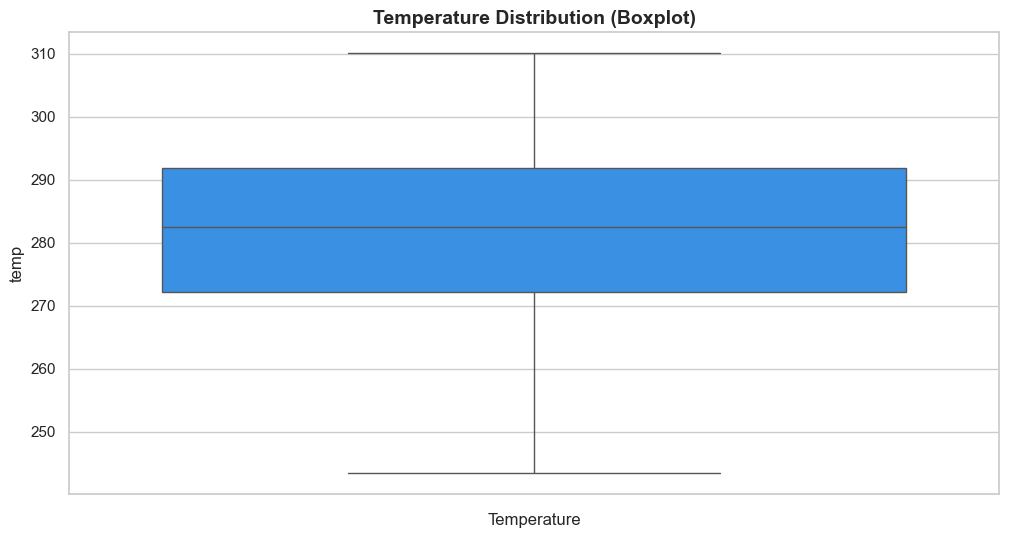

In [22]:
# Outlier removed from the DataFrame
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['temp'], color='dodgerblue') 
plt.title('Temperature Distribution (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('Temperature', fontsize=12)
plt.show()



**Insights** 
- The distribution of `temp` is **symmetric**, with no visible skewness.  
- **No outliers** are present, as no points lie outside the whiskers.  
- The **median is centered** within the interquartile range, showing a balanced spread.  
- This suggests the **`temp` data is clean and consistent**.

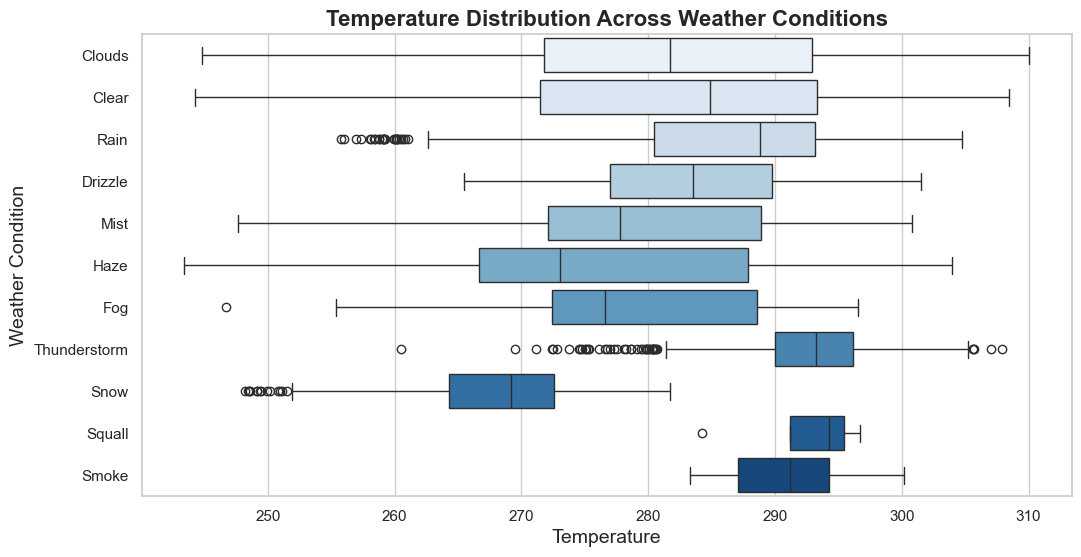

In [23]:
# Temperature Distribution Across Weather Conditions
sns.set(style="whitegrid")  
plt.figure(figsize=(12, 6))  
sns.boxplot(x='temp', y='weather_main', data=df, palette="Blues")

plt.title('Temperature Distribution Across Weather Conditions', fontsize=16, fontweight='bold')
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Weather Condition', fontsize=14)
plt.show()


**Insights** 
- **Clear & Clouds**: Occur across a wide temperature range.  
- **Snow**: Happens at the lowest temperatures (<280K).  
- **Rain & Drizzle**: Found in moderate temperatures (~265–300K).  
- **Thunderstorm**: Occurs mostly at high temperatures (>285K).  


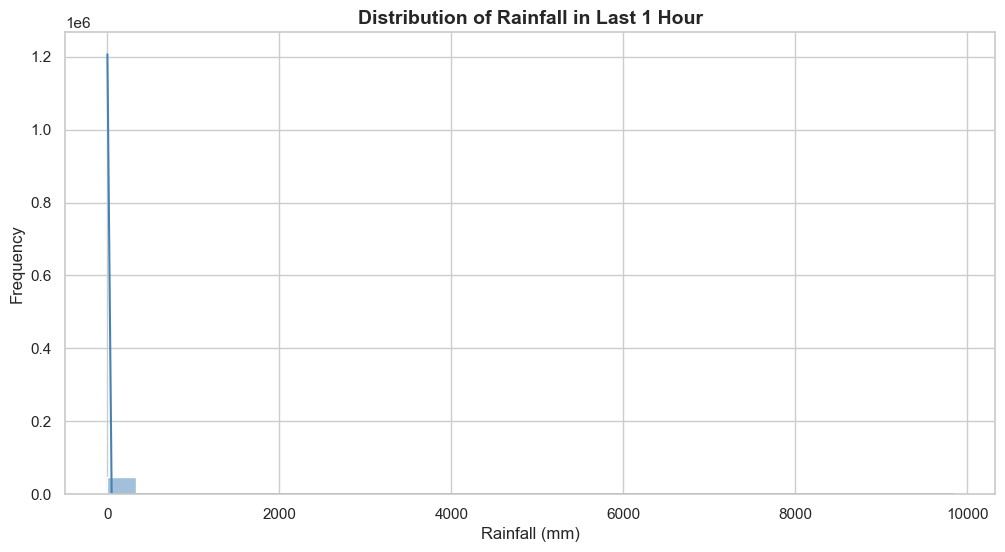

In [24]:
# Creating the distribution plot of rainfall
sns.set(style="whitegrid", palette="Blues")
plt.figure(figsize=(12, 6))
sns.histplot(df['rain_1h'], kde=True, color='steelblue', bins=30)

plt.title('Distribution of Rainfall in Last 1 Hour', fontsize=14, fontweight='bold')
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


**Insights** 
- The `rain_1h` distribution is **highly right-skewed**.  
- **Most values are near zero**, indicating frequent light or no rain.  


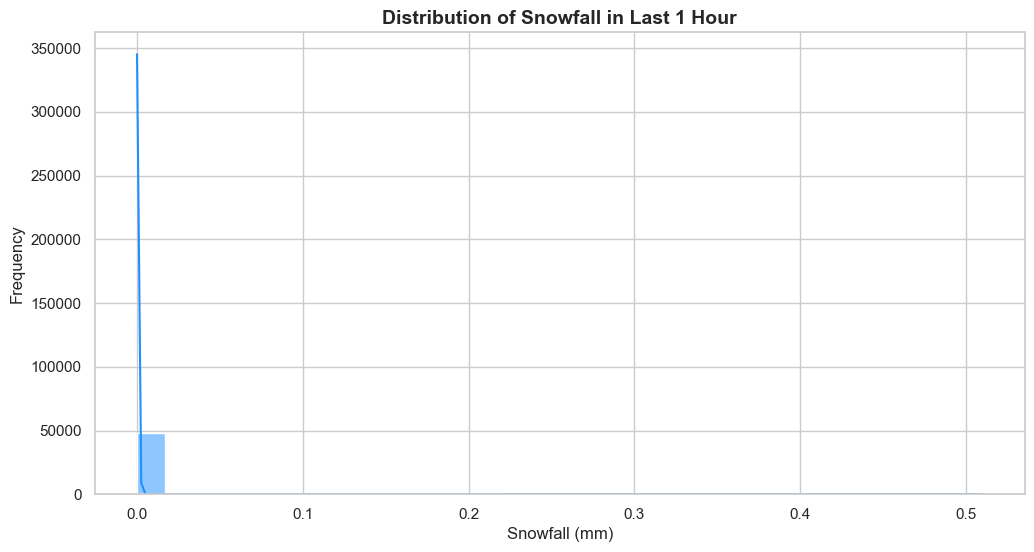

In [25]:
# Creating the distribution plot of snowfall
sns.set(style="whitegrid", palette="Blues")
plt.figure(figsize=(12, 6))
sns.histplot(df['snow_1h'], kde=True, color='dodgerblue', bins=30)

plt.title('Distribution of Snowfall in Last 1 Hour', fontsize=14, fontweight='bold')
plt.xlabel('Snowfall (mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


**Insights** 
- The `snow_1h` distribution is **extremely right-skewed**.  
- **Most values are clustered around 0**, indicating snowfall is rare.  


In [26]:
# Display the minimum and maximum cloud coverage percentage
df['clouds_all'].min(),df['clouds_all'].max()

(0, 100)

**Insights**
- **Minimum Cloud Coverage: 0%** – Represents completely clear sky conditions.  
- **Maximum Cloud Coverage: 100%** – Indicates fully overcast skies.  
- **Full Range Captured** – The data spans the entire spectrum of possible cloud conditions, from no clouds to complete cloud cover.  


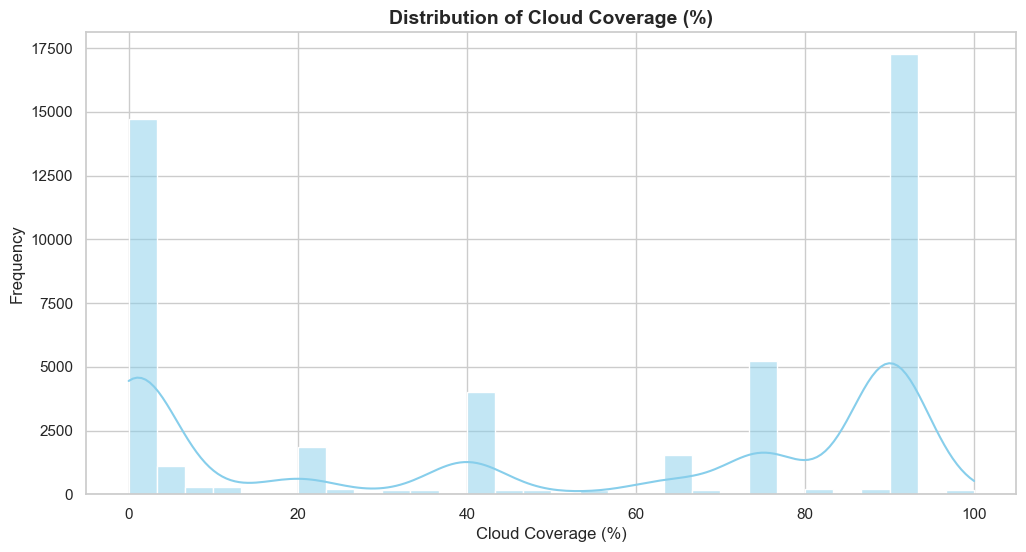

In [27]:
# Plot distribution of cloud coverage
sns.set(style="whitegrid", palette="Blues")
plt.figure(figsize=(12, 6))
sns.histplot(df['clouds_all'], kde=True, color='skyblue', bins=30)

plt.title('Distribution of Cloud Coverage (%)', fontsize=14, fontweight='bold')
plt.xlabel('Cloud Coverage (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


**Insights** 
- A **bimodal pattern** with peaks near 0 and 90.
  - This indicates that skies are most often either:
       - **Clear** (near 0).
       - **Heavily overcast** (near 90).
- The values are less frequent in the mid-range.
   - This suggests that **partly cloudy conditions** are relatively uncommon in the dataset.

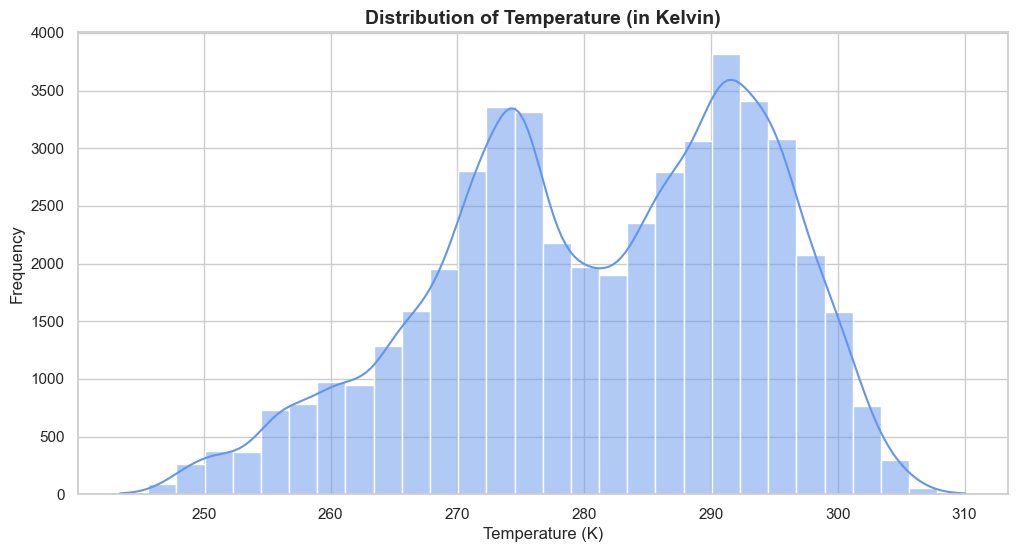

In [28]:
# Plot the distribution of temperature
sns.set(style="whitegrid", palette="Blues")
plt.figure(figsize=(12, 6))
sns.histplot(df['temp'], kde=True, color='cornflowerblue', bins=30)

plt.title('Distribution of Temperature (in Kelvin)', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


**Insights** 
- The distribution of the `temp` variable is **bimodal**, with two distinct peaks.
- These peaks likely represent different seasonal temperature patterns (e.g., summer vs. winter).
- The overall distribution is slightly left-skewed.

In [29]:
# List of selected weather-related variables
cols = ['clouds_all', 'rain_1h', 'snow_1h', 'temp']

# Loop through each column and print its skewness
for col in cols:
    skew_val = df[col].skew()
    print(f"Skewness of {col}: {skew_val:.2f}")


Skewness of clouds_all: -0.20
Skewness of rain_1h: 219.33
Skewness of snow_1h: 48.35
Skewness of temp: -0.36


**Insights** 
- **Clouds (clouds_all)**: Nearly symmetric distribution (skewness: -0.20).
- **Rain (rain_1h)**: Highly skewed, with most hours having little rain (skewness: 219.37).
- **Snow (snow_1h)**: Similar to rain, most hours have no snow (skewness: 48.36).
- **Temperature (temp)**: Slightly negative skew, almost symmetric (skewness: -0.36).

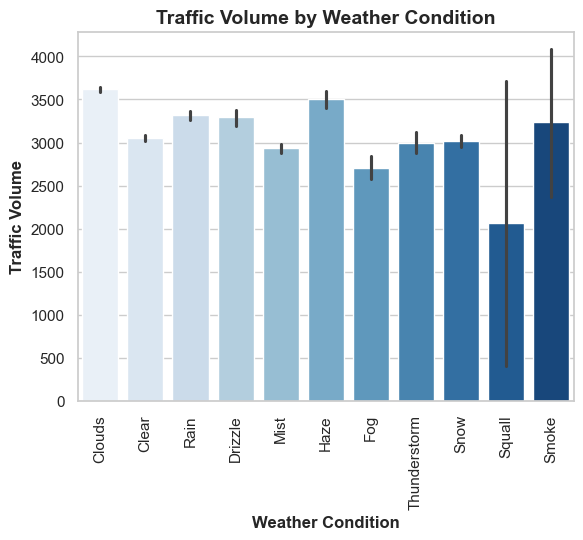

In [30]:
# Analysis of Traffic Volume by Weather Condition
sns.set_style("whitegrid")
sns.barplot(data=df, x='weather_main', y='traffic_volume', palette='Blues')

plt.xticks(rotation=90)
plt.xlabel('Weather Condition', fontsize=12, fontweight='bold')
plt.ylabel('Traffic Volume', fontsize=12, fontweight='bold')
plt.title('Traffic Volume by Weather Condition', fontsize=14, fontweight='bold')
plt.show()


**Insights** 
- The barplot shows that **traffic volume is highest during cloudy weather**, followed by haze and rain.
- **Snow, squall, and fog** are associated with **lower traffic volumes**, likely due to reduced mobility or safety concerns.
- There is higher variation in traffic volume under rare conditions like **squall** and **smoke**.
- This suggests **less consistent traffic patterns** during these rare weather conditions.

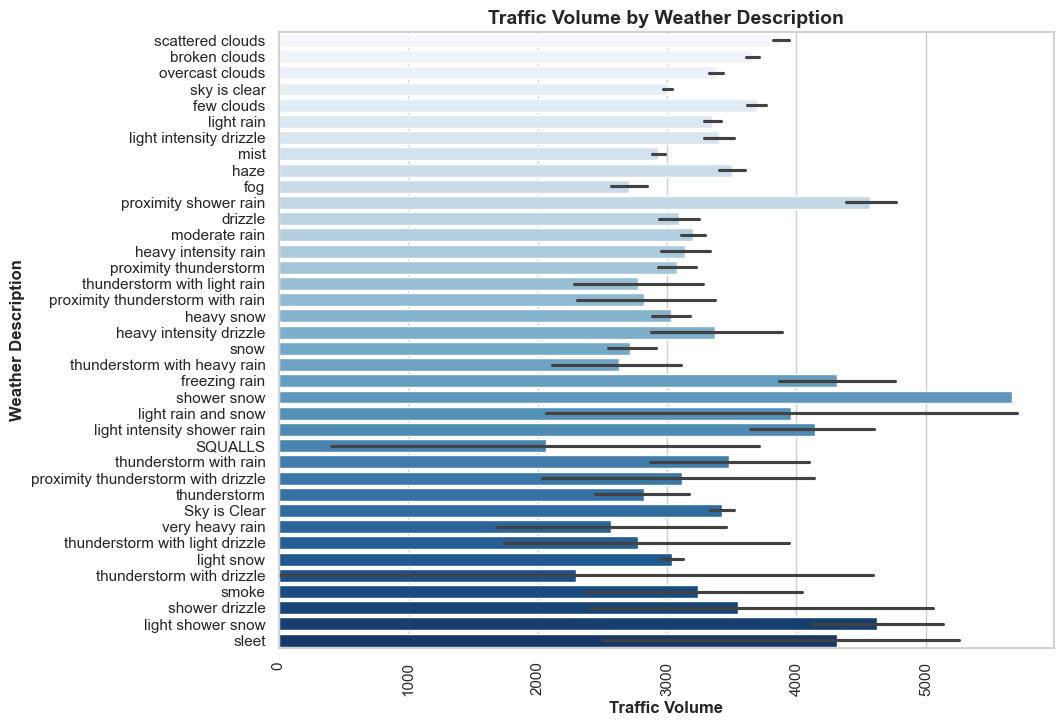

In [31]:
# Analysis of Traffic Volume by Weather Description
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.barplot(data=df, y='weather_description', x='traffic_volume', palette='Blues')

plt.xticks(rotation=90)
plt.xlabel('Traffic Volume', fontsize=12, fontweight='bold')
plt.ylabel('Weather Description', fontsize=12, fontweight='bold')
plt.title('Traffic Volume by Weather Description', fontsize=14, fontweight='bold')
plt.show()


**Insights** 
- The barplot indicates that **"proximity shower rain"** and **"shower snow"** are associated with the **highest traffic volumes**, suggesting heavy traffic despite adverse weather.
- Conditions like **"smoke"**, **"squalls"**, **"light snow"**, and **"very heavy rain"** tend to correspond with **lower traffic volumes**, likely due to hazardous driving conditions.
- Overall, specific weather descriptions show **varied impacts on traffic behavior**.

In [32]:
data = df.copy()
# create new columns from date_time
data['weekday'] = data.date_time.dt.weekday
data['hour'] = data.date_time.dt.hour
data['month'] = data.date_time.dt.month
data['year'] = data.date_time.dt.year
#Monday is 0 and Sunday is 6

**Explanation**

 New time-based features—**weekday**, **hour**, **month**, and **year**—have been extracted from the `date_time` column to support temporal analysis. These features help in identifying patterns such as peak traffic hours, seasonal trends, or weekday vs. weekend variations.

In [33]:
data.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,hour,month,year
0,no holiday,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,9,10,2012
1,no holiday,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,10,10,2012
2,no holiday,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,11,10,2012
3,no holiday,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,12,10,2012
4,no holiday,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,13,10,2012


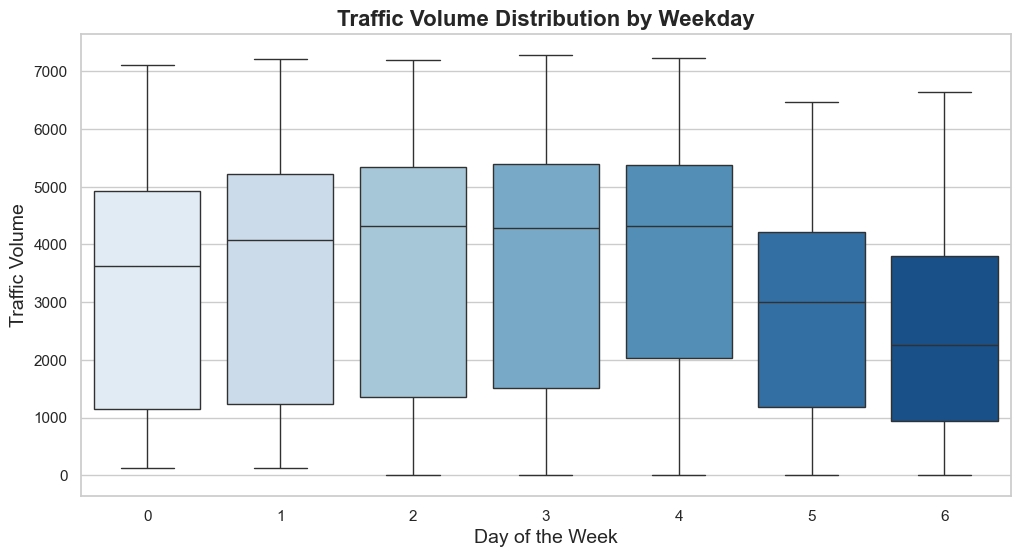

In [34]:
# Distribution of Traffic Volume by Weekday
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='traffic_volume', data=data, palette='Blues')

plt.title('Traffic Volume Distribution by Weekday', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.show()


**Insights** 

The boxplot shows the distribution of traffic volume across different weekdays (0 = Monday, 6 = Sunday). From the graph, we can conclude:

- Weekdays (especially Tuesday to Thursday) tend to have higher median traffic volumes.
- Weekends (Saturday and Sunday) show lower median traffic volumes and generally less traffic overall.
- There is more variability in traffic on weekdays compared to weekends.

This suggests traffic is heaviest during the workweek and lighter on weekends.

In [35]:
# Converting the hour column into categorical time ranges like 'Morning', 'Afternoon', etc.
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late Night'
    
data['hour'] = data.hour.apply(hour_modify)

**Explanation** 

 The `hour` column has been transformed into categorical time segments like *Morning*, *Afternoon*, and *Late Night* using the `hour_modify` function. This simplifies time-based analysis by grouping hours into meaningful parts of the day, making trends and patterns easier to interpret.

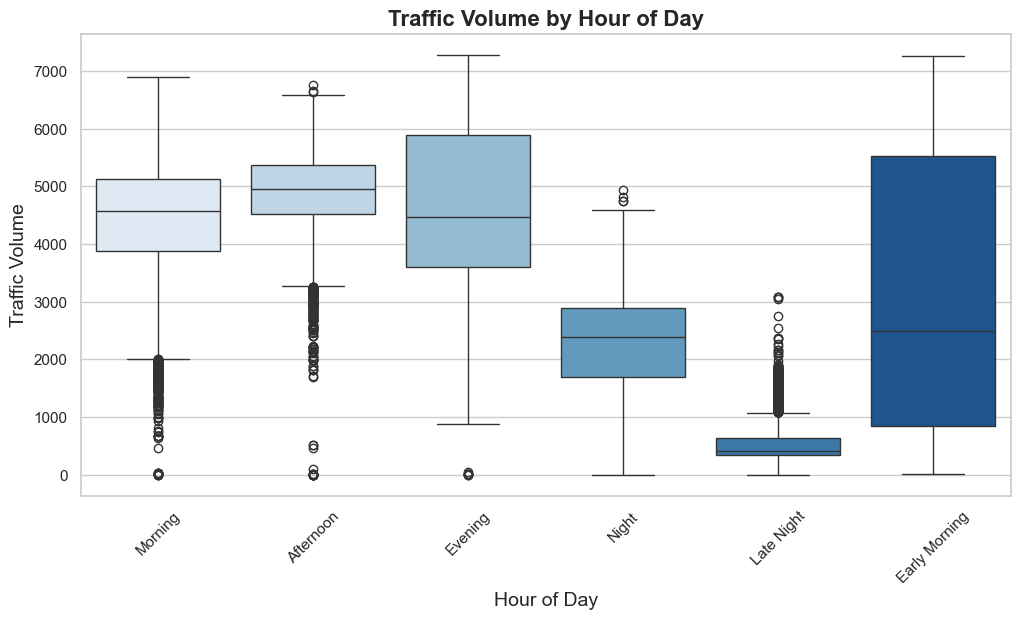

In [36]:
# Analysis of Traffic Volume by Hour of day
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='traffic_volume', data=data, palette='Blues')

plt.title('Traffic Volume by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.xticks(rotation=45)
plt.show()


**Insights** 

This boxplot illustrates traffic volume across different times of the day:

- *Morning, Afternoon, and Evening* hours have the highest traffic volumes, indicating peak commuting periods.
- *Early Morning* have slightly lower traffic volume.
- *Late Night and Night* have the lowest traffic volumes, as expected due to minimal movement during these times.
- There is significant variation during *Morning and Evening*, suggesting rush-hour fluctuations.

Overall, traffic volume is highest during active daytime hours and drops considerably at night.

In [37]:
# Convert 'month' and 'weekday' columns to categorical data types
data[['month','weekday']] = data[['month','weekday']].astype('category')

**Explanation** 

This converts the 'month' and 'weekday' columns to categorical data types.

In [38]:
# Display the data types of each column 
data.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
weekday                      category
hour                           object
month                        category
year                            int32
dtype: object

**Insights** 
- Dataset includes **numerical**, **categorical**, **datetime**, and **object** data types.  
- **Numerical features**: `temp`, `rain_1h`, `traffic_volume`.  
- **Categorical/labeled features**: `weekday`, `month`, `hour`.  
- **Datetime feature**: `date_time` retained for time-series analysis.

In [39]:
# remove 'weather_description', 'year' column
data.drop(['weather_description','year'], axis=1, inplace=True)

**Insights** 

The columns `weather_description` and `year` have been removed from the dataset, likely to reduce redundancy or irrelevance. This simplifies the dataset and may help improve model performance by focusing only on the most impactful features.

In [40]:
# Preview the first 5 rows of the dataset to get an overview of the data structure
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume,weekday,hour,month
0,no holiday,288.28,0.0,0.0,40,Clouds,2012-10-02 09:00:00,5545,1,Morning,10
1,no holiday,289.36,0.0,0.0,75,Clouds,2012-10-02 10:00:00,4516,1,Morning,10
2,no holiday,289.58,0.0,0.0,90,Clouds,2012-10-02 11:00:00,4767,1,Morning,10
3,no holiday,290.13,0.0,0.0,90,Clouds,2012-10-02 12:00:00,5026,1,Afternoon,10
4,no holiday,291.14,0.0,0.0,75,Clouds,2012-10-02 13:00:00,4918,1,Afternoon,10


**Insights**
- **No missing values** observed in the first few rows.  
- `holiday`, `weather_main`, `weekday`, `hour`, and `month` appear to be **categorical** in nature.  
- `temp`, `rain_1h`, `snow_1h`, `clouds_all`, and `traffic_volume` are **numerical** features.  
- `date_time` is in proper **datetime format** for time-series analysis.  
- `traffic_volume` varies by **hour and weekday**, which may be useful for pattern detection.  

In [41]:
# Drop 'rain_1h' and 'snow_1h' columns as they contain mostly zeros or irrelevant information
data.drop(['rain_1h','snow_1h'],axis=1,inplace=True)

**Explanation** 

This removes the `rain_1h` and `snow_1h` columns from the dataset in place. It's likely done because these features are highly skewed with many zero values, offering limited predictive power or potentially introducing noise in modeling.

In [42]:
# Check skewness of 'traffic_volume' to assess data distribution
data['traffic_volume'].skew()

-0.08932776841234133

**Insights** 

The skewness of `traffic_volume` is approximately **-0.09**, indicating a nearly symmetric distribution with a slight left skew.

### Machine Learning Pipeline

In [43]:
# Set 'date_time' as the DataFrame index to enable time-series operations
data.set_index('date_time',inplace=True)

In [44]:
#Exporting DataFrame to CSV
#df.to_csv('cleaned.csv', index=False)  

In [45]:
# Reloading the cleaned dataset
#df = pd.read_csv('cleaned.csv')

In [46]:
data.head()

,holiday,temp,clouds_all,weather_main,traffic_volume,weekday,hour,month
date_time,,,,,,,,
2012-10-02 09:00:00,no holiday,288.28,40,Clouds,5545,1,Morning,10
2012-10-02 10:00:00,no holiday,289.36,75,Clouds,4516,1,Morning,10
2012-10-02 11:00:00,no holiday,289.58,90,Clouds,4767,1,Morning,10
2012-10-02 12:00:00,no holiday,290.13,90,Clouds,5026,1,Afternoon,10
2012-10-02 13:00:00,no holiday,291.14,75,Clouds,4918,1,Afternoon,10


#### Model Building  


In [47]:
# Define dependent and independent variables
X = data.drop('traffic_volume', axis=1)
y = data['traffic_volume']

**Insights** 

All columns except `'traffic_volume'` are used as input features (independent variables), and `'traffic_volume'` is the output we're trying to predict (dependent variable).

In [48]:
# Display all unique values in the 'hour' column to understand time categories present
X['hour'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night', 'Late Night',
       'Early Morning'], dtype=object)

In [49]:
# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size=0.8,
                                                      test_size=0.2,
                                                      random_state=42)

**Explanation** 

The data is split into 80% training and 20% testing subsets for model evaluation.

In [50]:
# Display a concise summary of the DataFrame including:
# - Column names and data types
# - Non-null counts (to check for missing values)
# - Memory usage
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48177 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   holiday         48177 non-null  object  
 1   temp            48177 non-null  float64 
 2   clouds_all      48177 non-null  int64   
 3   weather_main    48177 non-null  object  
 4   traffic_volume  48177 non-null  int64   
 5   weekday         48177 non-null  category
 6   hour            48177 non-null  object  
 7   month           48177 non-null  category
dtypes: category(2), float64(1), int64(2), object(3)
memory usage: 2.7+ MB


In [51]:
# Define lists of categorical and numerical feature names
categorical_cols = ['holiday', 'weather_main', 'weekday', 'hour', 'month']
numerical_cols = ['temp', 'clouds_all']

# --------------------- Numerical Pipeline ---------------------
# Pipeline for handling numerical features
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),    # Fill missing numeric values with median
    ('scaler', StandardScaler())                      # Standardize numerical features
])

# --------------------- Define Custom Categories ---------------------
# Custom order for ordinal encoding of categorical features
holiday_categories = ['no holiday', 'yes holiday']
hour_categories = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
month_categories = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
weather_main_categories = ['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog', 'Thunderstorm', 'Snow', 'Squall', 'Smoke']
weekday_categories = ['0', '1', '2', '3', '4', '5', '6']

# --------------------- Categorical Pipeline ---------------------
# Pipeline for handling categorical features
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with the most frequent value
    ('ordinalencoder', OrdinalEncoder(
        categories=[holiday_categories, weather_main_categories, weekday_categories, hour_categories, month_categories],
        handle_unknown='use_encoded_value',
        unknown_value=-1)),                                 # Ordinal encoding with custom category order
    ('scaler', StandardScaler())                           # Standardize encoded categorical features
])

# --------------------- Combine Pipelines ---------------------
# ColumnTransformer to apply the appropriate pipeline to each column type
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_cols),       # Apply to numerical features
    ('cat_pipeline', cat_pipeline, categorical_cols)      # Apply to categorical features
])


**Insights** 

  - The preprocessing pipeline is divided into two parts:
    - **Numerical Pipeline**:
      - Handles missing values using **median imputation**.
      - Scales the features.
    - **Categorical Pipeline**:
      - Handles missing values using **most frequent value imputation**.
      - Applies **ordinal encoding** with predefined categories.
      - Scales the features.
  - These transformations are combined using a `ColumnTransformer` to apply the appropriate preprocessing steps to **numerical** and **categorical columns separately**.

#### Model Training, Evaluation, and Selection

In [52]:
# List of regression models to evaluate
models = [
    DecisionTreeRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    CatBoostRegressor(),  # Suppress CatBoost output
    XGBRegressor()      # Suppress XGBoost output
]

# Corresponding labels for the models
model_labels = ['DecisionTree', 'AdaBoost', 'GradientBoost', 'RandomForest', 'CatBoost', 'XGBoost']

# List to store R² scores for each model
r2_scores = []

# Loop through each model
for model in models:
    # Create a pipeline with preprocessing and the current model
    data_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Apply preprocessing steps
        ('model', model)                 # Fit the regression model
    ])
    
    # Perform 10-fold cross-validation and compute mean R² score
    r2_score = cross_val_score(
        data_pipeline, X_train, y_train,
        cv=KFold(n_splits=10),          # 10-fold CV
        scoring='r2',                   # Use R² as the evaluation metric
        n_jobs=-1                       # Use all CPU cores for parallel processing
    ).mean()
    
    # Store the R² score for comparison
    r2_scores.append(r2_score)


**Insights** 
- Evaluates **6 regression models**: DecisionTree, AdaBoost, GradientBoost, RandomForest, CatBoost, XGBoost  
- Uses **10-fold cross-validation**  
- **R² score** is calculated for each model  

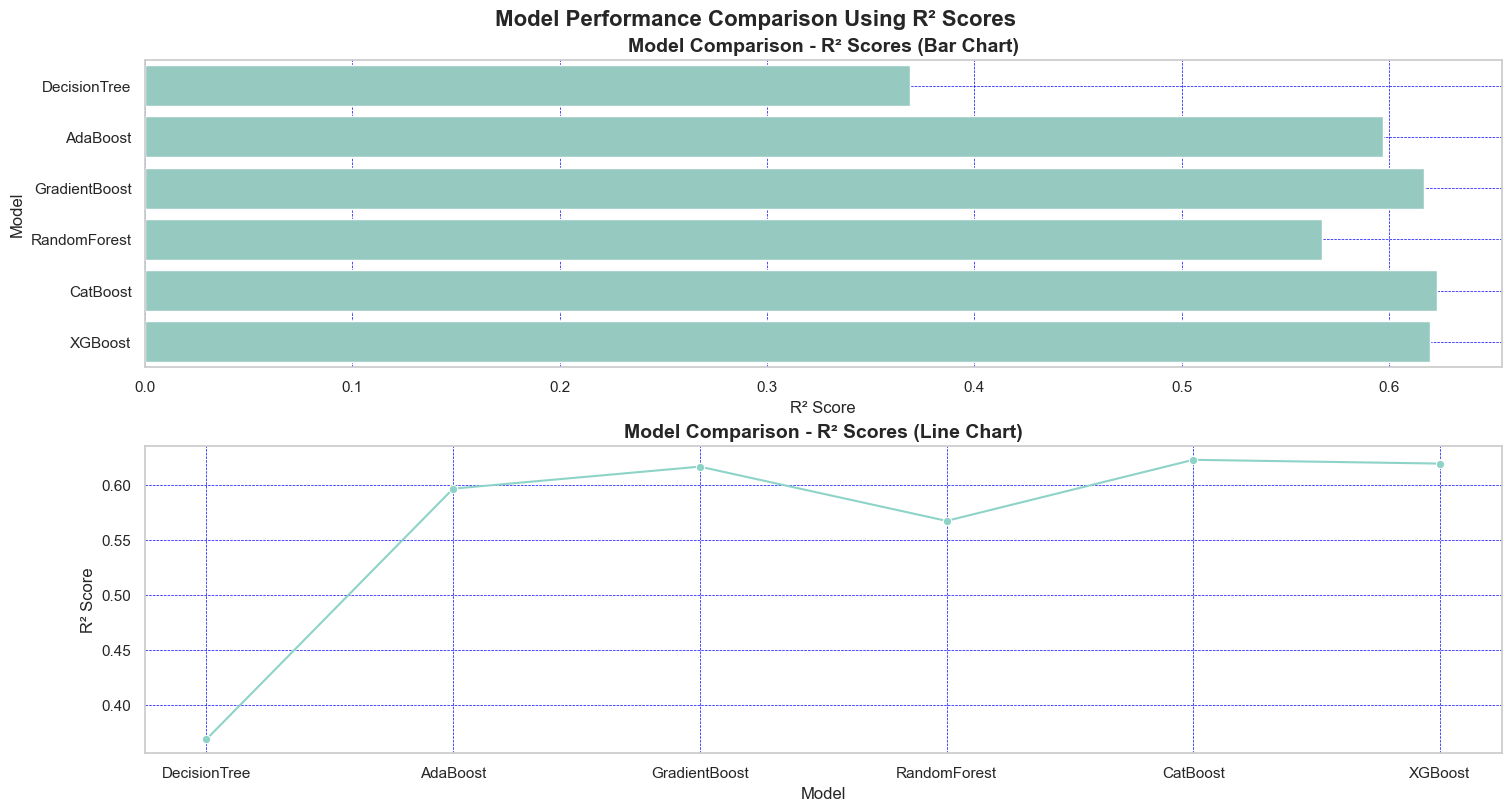

In [53]:
# Model Performance Comparison Using R² Scores
sns.set_theme(style="whitegrid", palette="Set3")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8), constrained_layout=True)
sns.barplot(x=r2_scores, y=model_labels, ax=axes[0])

axes[0].set_title('Model Comparison - R² Scores (Bar Chart)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('R² Score', fontsize=12)
axes[0].set_ylabel('Model', fontsize=12)
axes[0].grid(True, color='blue', linestyle='--', linewidth=0.5)
sns.lineplot(x=model_labels, y=r2_scores, marker='o', ax=axes[1])

axes[1].set_title('Model Comparison - R² Scores (Line Chart)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('R² Score', fontsize=12)
axes[1].grid(True, color='blue', linestyle='--', linewidth=0.5)
plt.suptitle('Model Performance Comparison Using R² Scores', fontsize=16, fontweight='bold')
plt.show()


**Insights** 

This graph compares model performance using two visualizations:

- The *bar chart* (top) shows that *GradientBoost*, *CatBoost*, and *XGBoost* have the highest scores, indicating better predictive performance.
- The *line plot* (bottom) confirms a similar trend, peaking at GradientBoost and CatBoost, while *DecisionTree* has the lowest performance.

*Conclusion:* Ensemble methods (especially GradientBoost, CatBoost, and XGBoost) outperform the simpler Decision Tree, making them better choices for this prediction task.

In [54]:
# Combine model names with their corresponding R² scores
results = zip(model_labels, r2_scores)

# Display the results as a list of tuples
print("Model Performance (R² Scores):")
for model, score in results:
    print(f"{model}: {score:.4f}")


Model Performance (R² Scores):
DecisionTree: 0.3691
AdaBoost: 0.5969
GradientBoost: 0.6169
RandomForest: 0.5676
CatBoost: 0.6231
XGBoost: 0.6197


### Model Performance Comparison

Here are the R² scores for each model, along with the real values:

| Model         | R² Score |
|---------------|----------|
| DecisionTree  | 0.36     |
| AdaBoost      | 0.59     |
| GradientBoost | 0.61     |
| RandomForest  | 0.56     |
| CatBoost      | 0.62  ✅ |
| XGBoost       | 0.62     |


CatBoost slightly outperforms the other models with an R² score of 0.623, making it the best among the tested models.

### Conclusion

- We successfully built traffic volume prediction models.
- CatBoost Regressor achieved the highest R² Score of 0.623.
- Features like hour of the day and weekday significantly influenced traffic.
